In [1]:
import pandas as pd
import glob
from datetime import datetime, timedelta

In [7]:
session="Session_10222024"
session_date = "10-22"

labelsB = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/IntersectionB/Labels/{session_date}-camB.csv")
labelsB_9m = labelsB[['timestamp'] + [col for col in labelsB.columns if '9m' in col and 'recorder' in col and not 'view' in col]]

rename_map = {
    col: col + '_b' for col in labelsB_9m.columns
    if 'recorder' in col and '9m' in col
}
labelsB_9m = labelsB_9m.rename(columns=rename_map)
print(labelsB_9m.columns)
print(labelsB_9m.shape)


labelsC = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/IntersectionC/Labels/{session_date}-camC.csv")
labelsC_9m = labelsC[['timestamp'] + [col for col in labelsC.columns if '9m' in col and 'recorder' in col and not 'view' in col]]

rename_map = {
    col: col + '_c' for col in labelsC_9m.columns
    if 'recorder' in col and '9m' in col
}
labelsC_9m = labelsC_9m.rename(columns=rename_map)
print(labelsC_9m.columns)
print(labelsC_9m.shape)


labelsD = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/IntersectionD/Labels/{session_date}-camD.csv")
labelsD_9m = labelsD[['timestamp'] + [col for col in labelsD.columns if '9m' in col and 'recorder' in col and not 'view' in col]]

rename_map = {
    col: col + '_d' for col in labelsD_9m.columns
    if 'recorder' in col and '9m' in col
}
labelsD_9m = labelsD_9m.rename(columns=rename_map)
print(labelsD_9m.columns)
print(labelsD_9m.shape)


labelsP1 = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/Path1/Labels/{session_date}-camP1.csv")
labelsP1_9m = labelsP1[['timestamp'] + [col for col in labelsP1.columns if '9m' in col and 'recorder' in col and not 'view' in col]]
rename_map = {
    col: col + '_p1' for col in labelsP1_9m.columns
    if 'recorder' in col and '9m' in col
}
labelsP1_9m = labelsP1_9m.rename(columns=rename_map)
print(labelsP1_9m.columns)
print(labelsP1_9m.shape)

labels = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/Path2/Labels/{session_date}-camP2.csv")
labels_9m = labels[['timestamp'] + [col for col in labels.columns if '9m' in col and 'recorder' in col and not 'view' in col]]
print(labels_9m.columns)
print(labels_9m.shape)


Index(['timestamp', 'recorder1_9m_b', 'recorder2_9m_b', 'recorder3_9m_b'], dtype='object')
(154236, 4)
Index(['timestamp', 'recorder1_9m_c', 'recorder2_9m_c'], dtype='object')
(155717, 3)
Index(['timestamp', 'recorder1_9m_d', 'recorder2_9m_d', 'recorder3_9m_d',
       'recorder4_9m_d'],
      dtype='object')
(237927, 5)
Index(['timestamp', 'recorder1_9m_p1', 'recorder2_9m_p1'], dtype='object')
(139688, 3)
Index(['timestamp', 'recorder1_9m', 'recorder2_9m'], dtype='object')
(158796, 3)


In [3]:
p2_values = pd.read_csv(f"/media/chan/backup_SSD2/ASPED.c/{session}/Path2/Labels/{session_date}-camP2.csv")
print(p2_values.shape)


(160561, 18)


In [9]:
import pandas as pd
import glob
import os

folder_path = f"/home/schivilkar/dev/final_video_processing/{session}/Path2/FinalFlows" 
file_list = sorted(glob.glob(os.path.join(folder_path, "GH*full_pedestrian_flow.csv")))
print(file_list)
flows = []

for idx, file in enumerate(file_list):

    df = pd.read_csv(file)
    print(df.shape)
    # if idx == 0:
    #     df = df.iloc[2:]
    
    flows.append(df)

merged_flows = pd.concat(flows, ignore_index=True)
print(merged_flows.shape)
print(merged_flows.columns)


#Last video which isn't included for session_10222024 -> count: 15718
labels_9m = labels_9m[:-15718]





['/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH010009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH020009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH030009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH040009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH050009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH060009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH070009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH080009full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_10222024/Path2/FinalFlows/GH090009

In [26]:
flow_last_cols = merged_flows.iloc[:, -4:]
print(flow_last_cols.shape)
final_flow = pd.concat([labels_9m, flow_last_cols], axis=1)
recorder_flow_data = final_flow.merge(labelsB_9m, on='timestamp', how='left')
recorder_flow_data = recorder_flow_data.merge(labelsC_9m, on='timestamp', how='left')
recorder_flow_data = recorder_flow_data.merge(labelsD_9m, on='timestamp', how='left')
recorder_flow_data = recorder_flow_data.merge(labelsP1_9m, on='timestamp', how='left')
print(recorder_flow_data.shape)
print(recorder_flow_data.columns)


(160561, 4)
(160561, 18)
Index(['timestamp', 'recorder1_9m', 'recorder2_9m', 'A_to_B', 'B_to_A',
       'Total_A_to_B', 'Total_B_to_A', 'recorder1_9m_b', 'recorder2_9m_b',
       'recorder3_9m_b', 'recorder1_9m_c', 'recorder2_9m_c', 'recorder1_9m_d',
       'recorder2_9m_d', 'recorder3_9m_d', 'recorder4_9m_d', 'recorder1_9m_p1',
       'recorder2_9m_p1'],
      dtype='object')


In [27]:
output_folder_path = f"/home/schivilkar/dev/final_video_processing/DataSummary/Path2/"
recorder_flow_data.to_csv(f"{output_folder_path}/{session}_Recorder_Flow_Data.csv", index=False)



In [32]:
#Merge all files:

output_folder_path = f"/home/schivilkar/dev/final_video_processing/DataSummary/Path1/"
csv_files = [
    "Session_02152024_Recorder_Flow_Data.csv",
    "Session_02292024_Recorder_Flow_Data.csv",
    "Session_10222024_Recorder_Flow_Data.csv",
    "Session_10292024_Recorder_Flow_Data.csv"
]

dfs = []

for file in csv_files:
    file_path = os.path.join(output_folder_path, file)
    df = pd.read_csv(file_path)
    print(f"{file} → Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}\n")
    print(df['B_to_A'].value_counts().sort_index())

    dfs.append(df)

# Concatenate all DataFrames
merged_all_sessions = pd.concat(dfs, ignore_index=True)

# Final merged shape
print(f"Final merged shape: {merged_all_sessions.shape}")


Session_02152024_Recorder_Flow_Data.csv → Shape: (140128, 12)
Columns: ['timestamp', 'recorder1_9m', 'recorder2_9m', 'A_to_B', 'B_to_A', 'Total_A_to_B', 'Total_B_to_A', 'recorder1_9m_b', 'recorder2_9m_b', 'recorder3_9m_b', 'recorder1_9m_c', 'recorder2_9m_c']

B_to_A
0    139655
1       403
2        69
3         1
Name: count, dtype: int64
Session_02292024_Recorder_Flow_Data.csv → Shape: (154559, 12)
Columns: ['timestamp', 'recorder1_9m', 'recorder2_9m', 'A_to_B', 'B_to_A', 'Total_A_to_B', 'Total_B_to_A', 'recorder1_9m_b', 'recorder2_9m_b', 'recorder3_9m_b', 'recorder1_9m_c', 'recorder2_9m_c']

B_to_A
0    154419
1       125
2        13
3         2
Name: count, dtype: int64
Session_10222024_Recorder_Flow_Data.csv → Shape: (139688, 12)
Columns: ['timestamp', 'recorder1_9m', 'recorder2_9m', 'A_to_B', 'B_to_A', 'Total_A_to_B', 'Total_B_to_A', 'recorder1_9m_b', 'recorder2_9m_b', 'recorder3_9m_b', 'recorder1_9m_c', 'recorder2_9m_c']

B_to_A
0    138923
1       715
2        49
3         1
Nam

In [30]:
# Define output file path
output_file_path = os.path.join(output_folder_path, "Path1_All_Sessions.csv")

# Save to CSV
merged_all_sessions.to_csv(output_file_path, index=False)

print(f"Merged file saved at: {output_file_path}")


Merged file saved at: /home/schivilkar/dev/final_video_processing/DataSummary/Path1/Path1_All_Sessions.csv


In [34]:
import matplotlib.pyplot as plt

recorder_flow_data['timestamp'] = pd.to_datetime(recorder_flow_data['timestamp'], format='%Y-%m-%d %H:%M:%S')
recorder_flow_data['hour_of_day'] = recorder_flow_data['timestamp'].dt.hour

In [35]:
flow_by_hour = recorder_flow_data.groupby('hour_of_day').agg({
    'A_to_B': 'sum',
    'B_to_A': 'sum'
}).reset_index()

# Add a column for the total flow
flow_by_hour['Total_FlowAB'] = flow_by_hour['A_to_B'] + flow_by_hour['B_to_A']

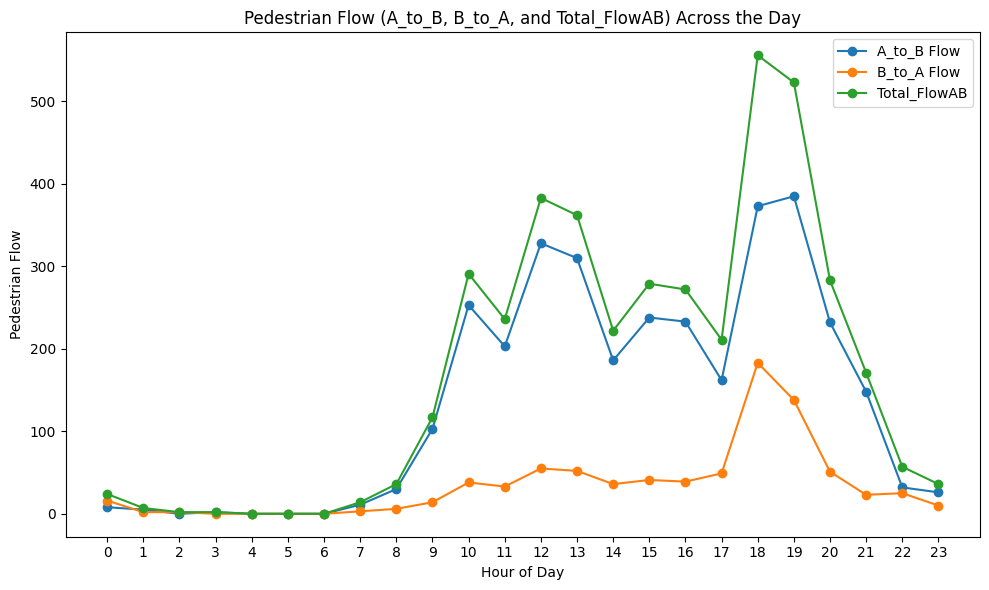

In [36]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_B'], label='A_to_B Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['B_to_A'], label='B_to_A Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAB'], label='Total_FlowAB', marker='o')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Pedestrian Flow')
plt.title('Pedestrian Flow (A_to_B, B_to_A, and Total_FlowAB) Across the Day')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour (0-23)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
peak_hours = flow_by_hour.set_index("hour_of_day").idxmax()
off_peak_hours = flow_by_hour.set_index("hour_of_day").idxmin()

peak_offpeak_df = pd.DataFrame({
    "Peak Hour": peak_hours,
    "Off-Peak Hour": off_peak_hours
})

# Print the table
print(peak_offpeak_df)


              Peak Hour  Off-Peak Hour
A_to_B               19              2
B_to_A               18              3
Total_FlowAB         18              4


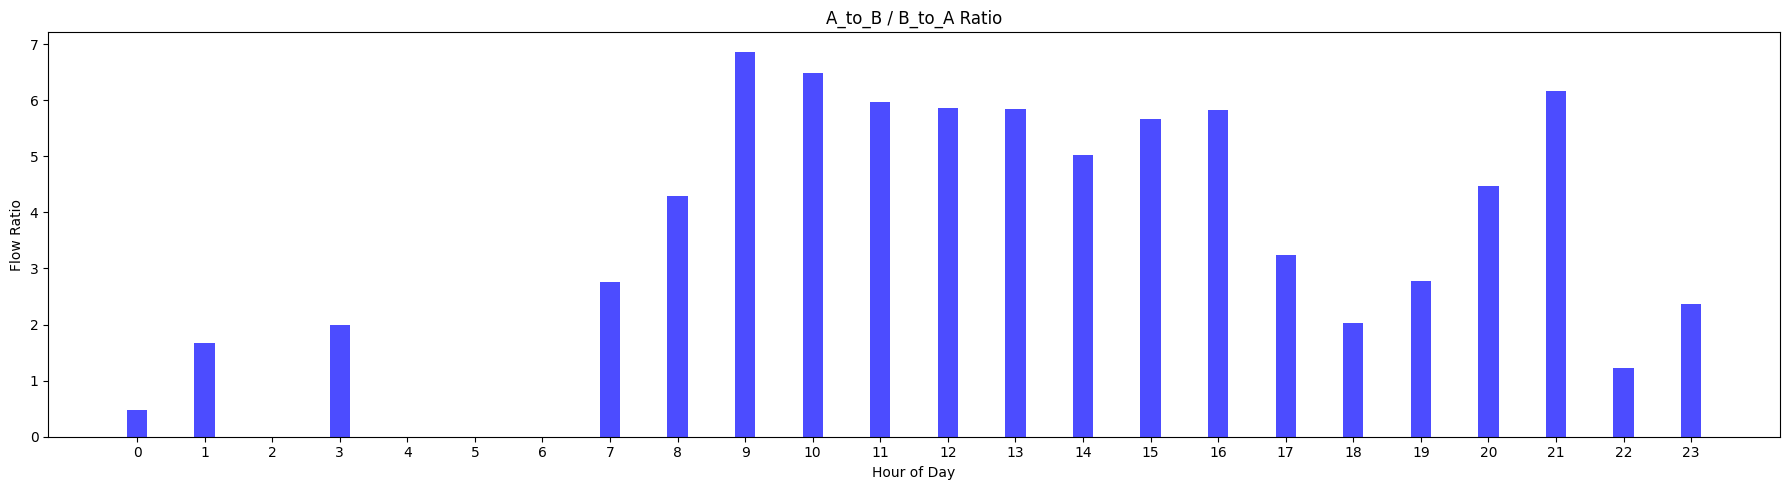

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Compute directional flow ratios
flow_by_hour['AB_ratio'] = flow_by_hour['A_to_B'] / (flow_by_hour['B_to_A'] + 1) 

# Set up bar width and positions
x = np.arange(len(flow_by_hour['hour_of_day']))  # X-axis positions
bar_width = 0.3  # Width of bars

# Create a figure with 1 row and 3 subplots horizontally
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)

# Bar Plot for AC Ratio
axes.bar(flow_by_hour['hour_of_day'], flow_by_hour['AB_ratio'], color='blue', alpha=0.7, width=bar_width)
axes.set_title("A_to_B / B_to_A Ratio")
axes.set_xlabel("Hour of Day")
axes.set_ylabel("Flow Ratio")
axes.set_xticks(range(0, 24)) 


# Adjust layout
plt.tight_layout()
plt.show()


          A_to_B    B_to_A
A_to_B  1.000000  0.831096
B_to_A  0.831096  1.000000


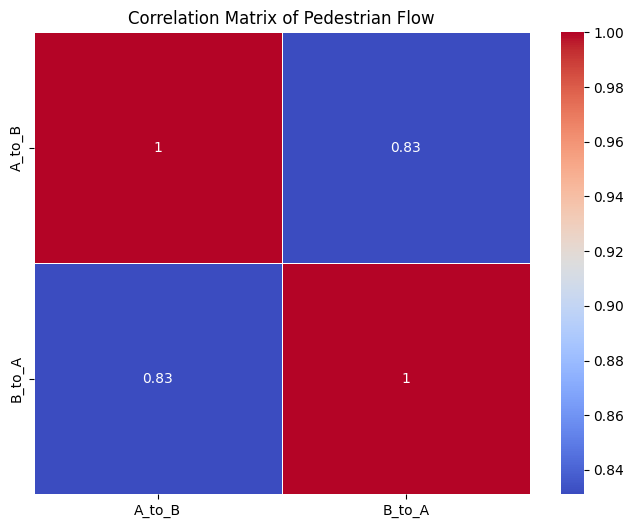

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['A_to_B', 'B_to_A']
correlation_matrix = flow_by_hour[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Pedestrian Flow")
plt.show()
